In [74]:
# OLS from scratch using numpy 
import numpy as np

In [75]:
np.__version__

'1.17.4'

In [76]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [77]:
dataset.data.shape


(506, 13)

In [78]:
dataset.target.shape


(506,)

In [79]:
X = dataset.data
y = dataset.target[:,np.newaxis]

In [80]:
y.shape

(506, 1)

In [81]:
X.shape

(506, 13)

In [82]:
# Mean squared error loss function 
def cost_func(X,y,weights):
    y_pred = np.dot(X,weights)
    n = len(y)
    cost = np.sum((y_pred - y)**2)/(2*n)
    return cost 

In [83]:
def gradient_descent(X,y,weights, learning_rate, iterations):
    n = len(y)
    cost_hist = np.zeros((iterations,1))
    
    for i in range(iterations):
        # weights = weights -  learning rate * d(cost)/d(weights) 
        # d(cost)/d(weights) = X(X*weights - y)/n ....do the calculations to check. 
        
        weights = weights - learning_rate * (X.T @ (X @ weights - y))/n
        cost_hist[i] = cost_func(X,y,weights)
        
    return cost_hist, weights 

In [98]:
#Normalising the values

n = len(y)
mean = np.mean(X,axis = 0 )
sigma = np.std(X,axis = 0)

X = (X-mean)/sigma

X.shape

/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


(506, 14)

In [99]:
mean.shape #Here numpy uses broadcasting algorithm to perform the X-mean operation 

(14,)

In [100]:
np.mean(X,axis = 0 ) 

array([            nan,  6.91146745e-18,  6.50116763e-16, -7.04201739e-16,
        4.80950370e-16,  3.43050138e-16, -1.67849924e-17,  6.18740895e-17,
        5.22199763e-17,  4.13810400e-16, -7.41611428e-17, -2.16164372e-15,
        1.10583479e-15, -5.52917396e-17])

In [85]:
# #Normalising Y values - Not actually required 
# n = len(y)
# mean = np.mean(y,axis = 0 )
# sigma = np.std(y,axis = 0)

# y = (y-mean)/sigma

# y.shape

(506, 1)

In [86]:
#Adding 1s coluimn so that the constant can also be counted in X 

X = np.hstack((np.ones((n,1)),X))

In [87]:
X.shape

(506, 14)

In [88]:
n_features = X.shape[1]

In [89]:
n_features

14

In [90]:
weights = np.zeros((n_features,1))
weights.shape

(14, 1)

In [91]:
#Actual function 

iterations = 1500
learning_rate = 0.01

initial_cost = cost_func(X,y,weights)
initial_cost

0.4999999999999999

In [92]:
cost_hist , ideal_weights = gradient_descent(X,y,weights,learning_rate,iterations)
ideal_weights

array([[ 3.83833830e-16],
       [-9.14026266e-02],
       [ 1.00796823e-01],
       [-1.90922568e-02],
       [ 7.90989715e-02],
       [-1.98486307e-01],
       [ 3.03055233e-01],
       [-6.14985531e-03],
       [-3.22915945e-01],
       [ 1.96762036e-01],
       [-1.28454508e-01],
       [-2.17664487e-01],
       [ 9.31604269e-02],
       [-4.02181051e-01]])

In [93]:
cost_hist

array([[0.47378251],
       [0.45030226],
       [0.42924321],
       ...,
       [0.13038817],
       [0.13038712],
       [0.13038607]])

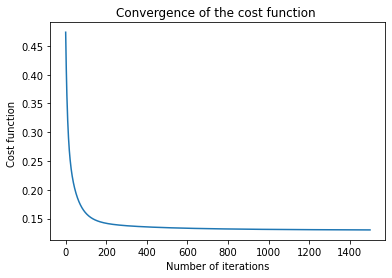

In [94]:

import matplotlib.pyplot as plt
plt.plot(range(len(cost_hist)) , cost_hist)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost function ")

plt.title("Convergence of the cost function ")
plt.show()

In [95]:
#Predicting the results 

y_pred = X @ ideal_weights

In [96]:
# Measuring accuracy or R2 of the test 
R2 = np.sum((y_pred - np.mean(y))**2)/np.sum((y - np.mean(y))**2)
R2

0.7316653250970853

In [ ]:
#We can next compare this to the 